In [2]:
import pandas as pd

df = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.shape

(20640, 9)

In [4]:
df = df[['Latitude', 'Longitude', 'MedInc']]

In [5]:
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train_scaled)

train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_scaled)

df.loc[X_train.index, 'cluster'] = train_clusters
df.loc[X_test.index, 'cluster'] = test_clusters 

/tmp/ipykernel_6143/4189467180.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[X_train.index, 'cluster'] = train_clusters


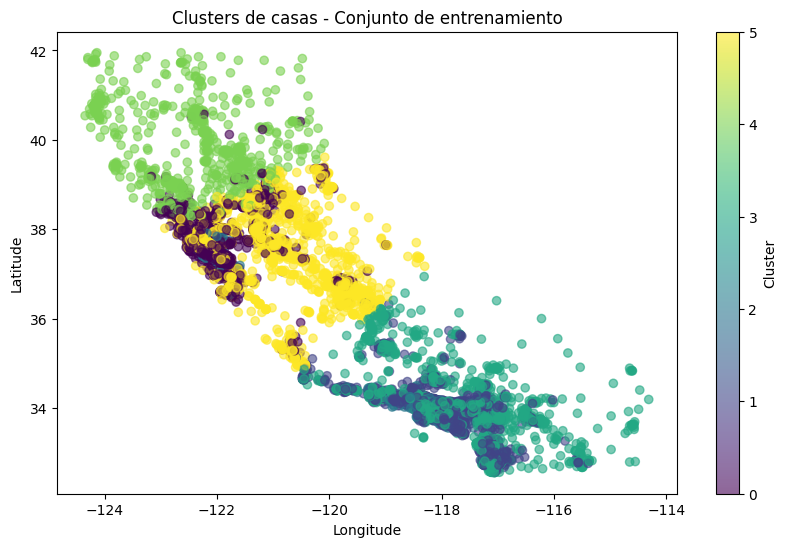

In [9]:
import matplotlib.pyplot as plt

# Plot de los clusters de X_train
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=train_clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('Clusters de casas - Conjunto de entrenamiento')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
df.head()

,Latitude,Longitude,MedInc,cluster
0,37.88,-122.23,8.3252,0.0
1,37.86,-122.22,8.3014,0.0
2,37.85,-122.24,7.2574,0.0
3,37.85,-122.25,5.6431,0.0
4,37.85,-122.25,3.8462,5.0


In [11]:
df.shape

(20640, 4)

In [12]:
df[['cluster']].groupby('cluster').value_counts()

cluster
0.0    3031
1.0    4451
2.0     599
3.0    6818
4.0    1228
5.0    4513
Name: count, dtype: int64

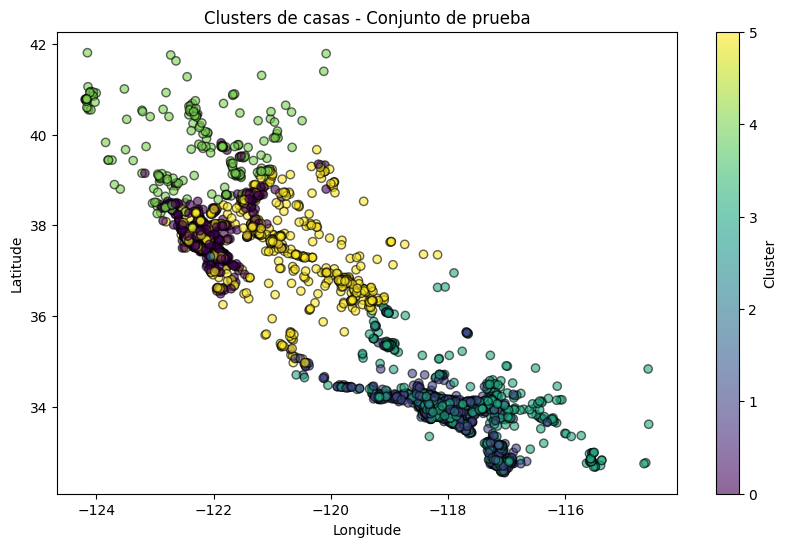

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=test_clusters, cmap='viridis', marker='o', edgecolors='black', alpha=0.6)
plt.title('Clusters de casas - Conjunto de prueba')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

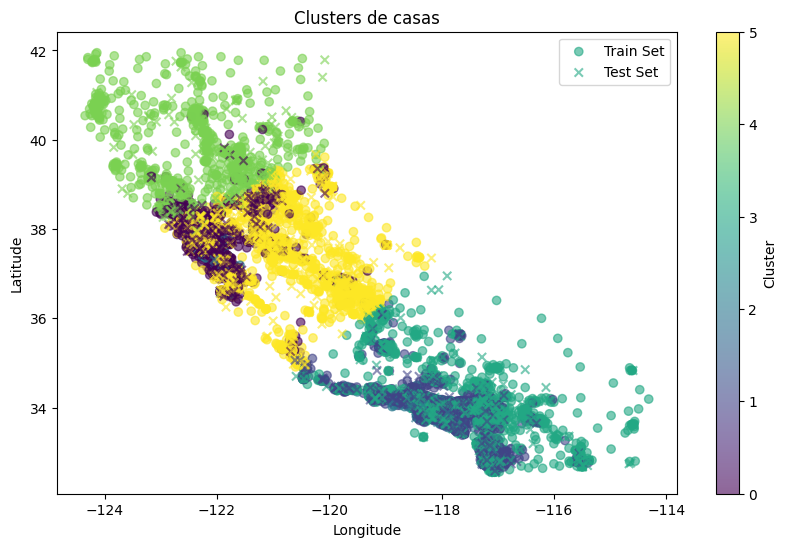

In [14]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))

# Puntos del conjunto de entrenamiento
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=train_clusters, cmap='viridis', marker='o', alpha=0.6, label='Train Set')

# Puntos del conjunto de prueba
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=test_clusters, cmap='viridis', marker='x', alpha=0.6, label='Test Set')

# Configuración adicional del gráfico
plt.title('Clusters de casas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.legend()

# Mostrar la visualización con ambos conjuntos de datos
plt.show()

In [15]:
X = df.drop('cluster', axis=1)
y = df['cluster']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9881298449612403
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       557
         1.0       0.99      1.00      0.99       897
         2.0       1.00      0.97      0.99       116
         3.0       1.00      0.99      0.99      1397
         4.0       1.00      0.92      0.96       246
         5.0       0.97      0.99      0.98       915

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.98      4128
weighted avg       0.99      0.99      0.99      4128



In [19]:
from joblib import dump

# Guardar el modelo KMeans
dump(kmeans, 'kmeans_model.joblib')

# Guardar el modelo de Regresión Logística
dump(model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']